In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [2]:
!pip install pycodestyle pycodestyle_magic
!pip install flake8
%load_ext pycodestyle_magic

In [3]:
%%pycodestyle

UsageError: %%pycodestyle is a cell magic, but the cell body is empty.


# Section 1: Business Understanding

* There are many strategy for your next campain. Choose the right target customer or product will save money for your company in marketing campaign and also get the best profit. So we will explore the data to answer the questions below.

### Question 1: Who should be target customer in the next campain?
* We will analysis customer demographics (age, gender, marital status, city_type, stay_in_current_city)

### Question 2: Which product should be care in the next campain?
* We will analysis product details (product_id and product category)

### Question 3: Which products are best selling ?
* We will analysis which product ID is best seller, and which is best seller with customer group age

In [5]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Section 2: Data Understanding

### Gather

In [6]:
df = pd.read_csv('data/train/train.csv')
print("data shape : ",df.shape)

data shape :  (550068, 12)


### Clean data

In [7]:
# check duplication
sum(df.duplicated())

0

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [11]:
for col in df.columns:
    print(col + ':', df[col].unique())

User_ID: [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID: ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender: ['F' 'M']
Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category: ['A' 'C' 'B']
Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']
Marital_Status: [0 1]
Product_Category_1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2: [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3: [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase: [ 8370 15200  1422 ...   135   123   613]


In [12]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
total = df.isnull().sum().sort_values(ascending=False)

#get percent of missing data relevant to all data
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000


* Product_Category_3 has missing value more than 60% so we delete this column

In [14]:
# delete column Product_Category_3
df=df.drop('Product_Category_3',axis=1)

* Product_Category_2 has value )is integer, we shouldn't fill missing value by mean (it will be decimal). We will fill it by meadian or mode. This time, we fill it by median.

In [15]:
#fill median for Product_Category_2
df.Product_Category_2.fillna(df.Product_Category_2.median(),inplace=True)

In [16]:
#check missing value
df.isnull().sum().max()

0

* Now there is no missing value

### Explore data analysis

In [18]:
# Function for visualize data
# countplot
def countplot(col):
    ''' This function provide the counts for the each series in a column and plot it in bar plot.
    
    Input: column name
    Output: plt bar plot of value counts
    '''
    plt.figure(figsize=(18,5))
    sns.countplot(df[col], order = df[col].value_counts().index)
    plt.title('Distribution of ' + col)
    plt.show()

# barplot of mean purchase
def barplot(col):
    '''This function provide the mean of purchase per series in a column and plot it in bar plot.
    
    Input: column name
    Output: plt bar plot of mean purchase
    '''
    plt.figure(figsize=(18,5))
    df.groupby(col).mean()["Purchase"].plot(kind='bar')
    plt.title(col + " and Purchase")
    plt.show()

def snsbox(col):
    '''This function provide the mean of purchase per series in a column and plot it in bar plot.
    
    Input: column name
    Output: box plot of purchase in each series in a column
    '''
    df[col] = df[col].astype(int)
    order = df.groupby(by = [col] )['Purchase'].mean().sort_values().index[::-1]
    sns.set(rc={'figure.figsize':(18,5)})
    sns.boxplot(df[col],df['Purchase'],order=order)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


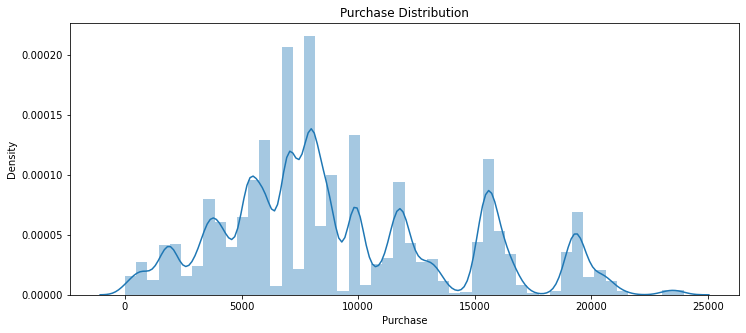

In [38]:
plt.figure(figsize=(12,5))
sns.distplot(df["Purchase"])
plt.title("Purchase Distribution")
plt.show()

0 frequency near 15000 and mid of 15000-20000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


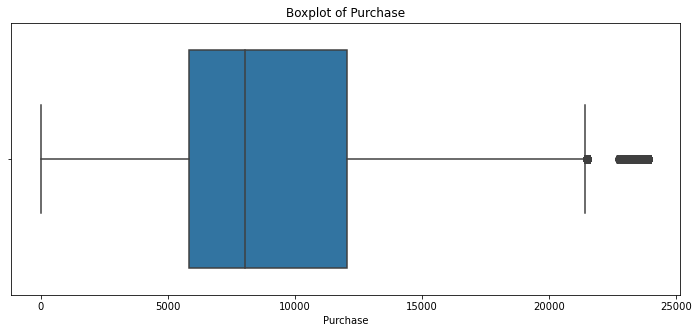

In [20]:
plt.figure(figsize=(12,5))
sns.boxplot(df["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

### Male or female who bought more?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


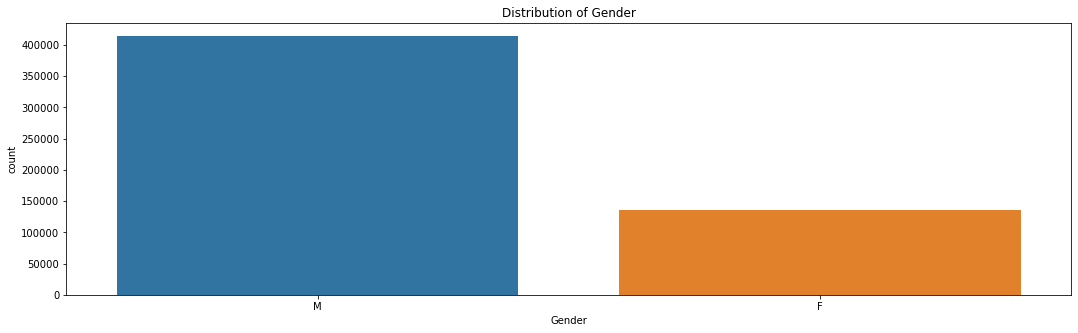

In [26]:
countplot('Gender')

In [22]:
df['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

* Male has bought more than female, the percentage of men buying is 75%.

In [39]:
df.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

* The mean purchase of male is more than female, but the difference is not very obvious.

### How about different of occupation?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


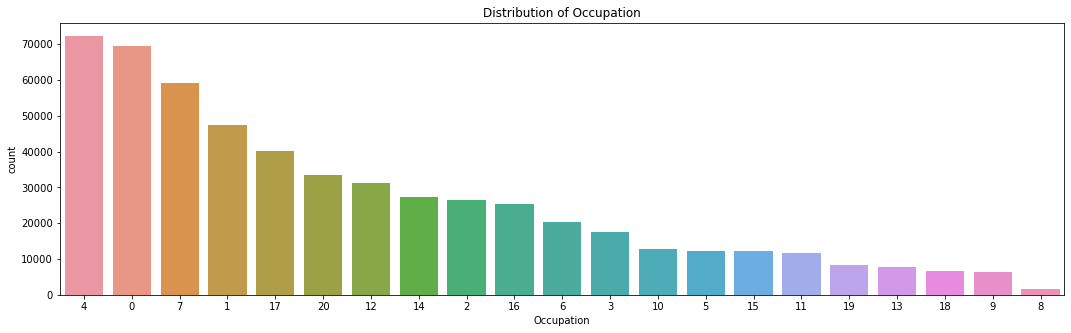

In [27]:
countplot('Occupation')

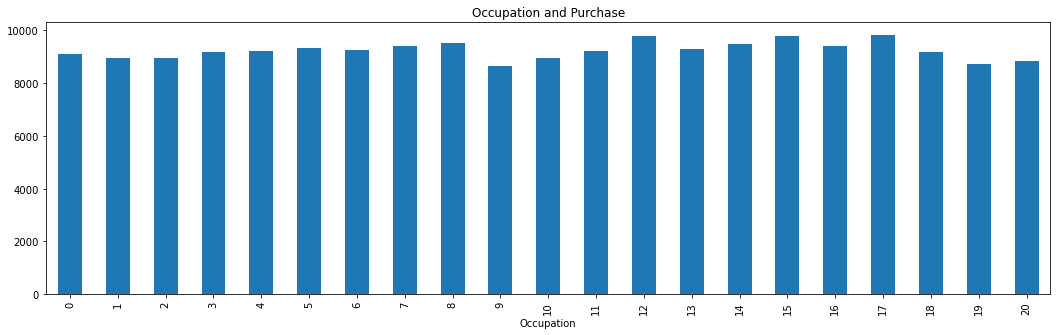

In [42]:
barplot('Occupation')

* The mean of each occupation is different, but the difference is not very obvious.
* The much of bought time in each occupation is different.

### How about city?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


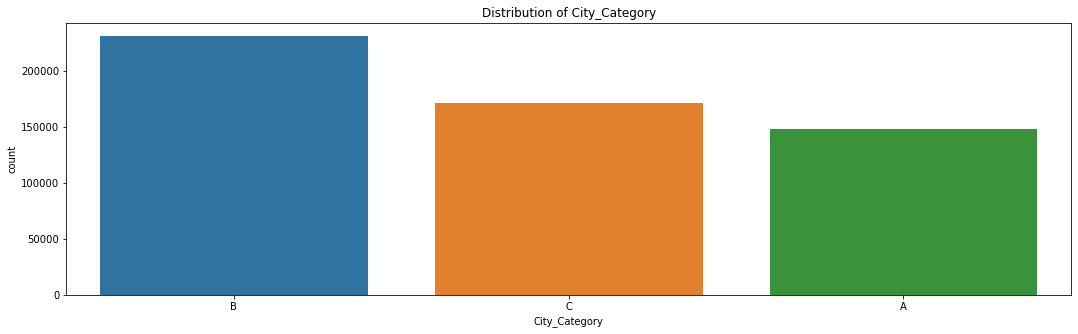

In [28]:
countplot('City_Category')

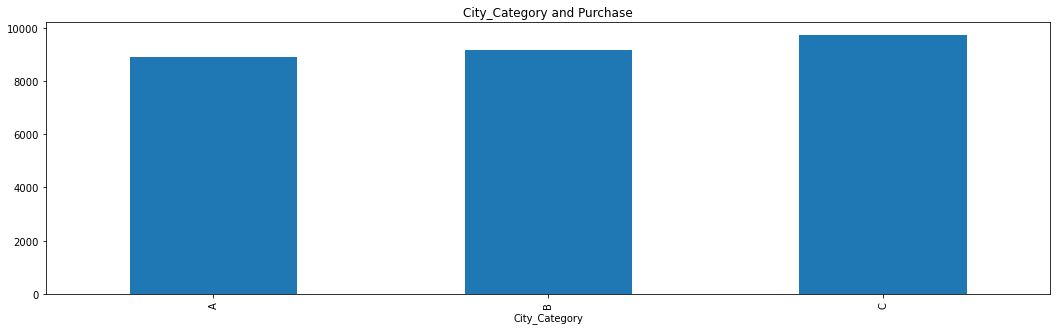

In [43]:
barplot("City_Category")

* The people in city C has mean of money buy more than people in city A, B. The city B has the most purchases.

### Stay_In_Current_City_Years 

* Do who live more time in current city has bought more?

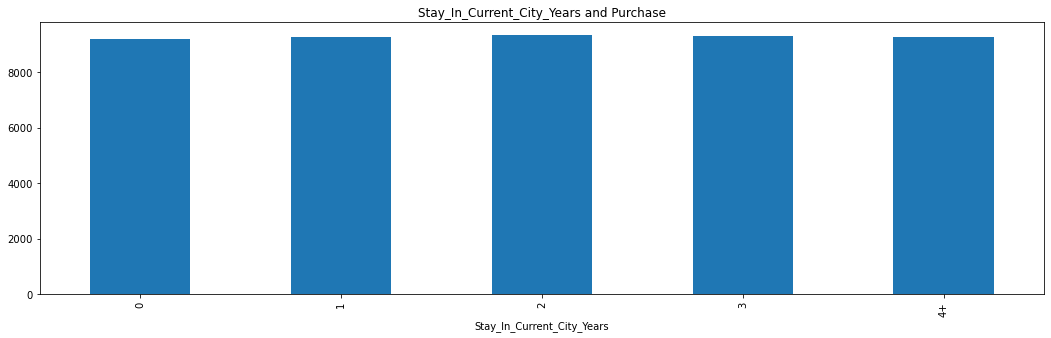

In [44]:
barplot("Stay_In_Current_City_Years")

* No, because mean of purchase is not different between number years of stay in city

### Do people who stay in the city longer buy more?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


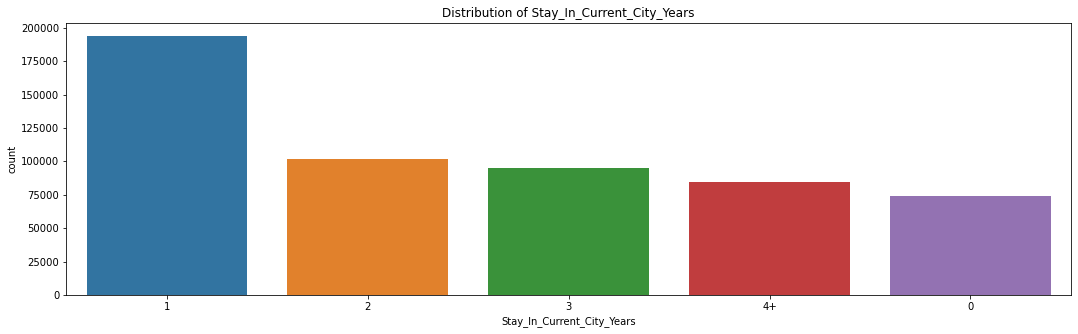

In [29]:
countplot('Stay_In_Current_City_Years')

* No. Because people who stay in the city longer have fewer purchases than others.
* We have to care about people who are within a year in the city because they have more purchases than others.

### Marital_Status

* Do married people spend more on average?

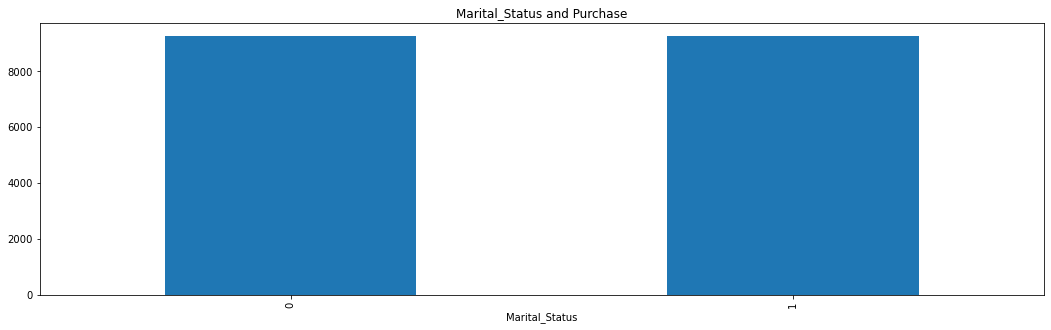

In [45]:
barplot("Marital_Status")

* No, there is no difference in the average amount of money spent between married and unmarried people

### Do married people have more shopping?

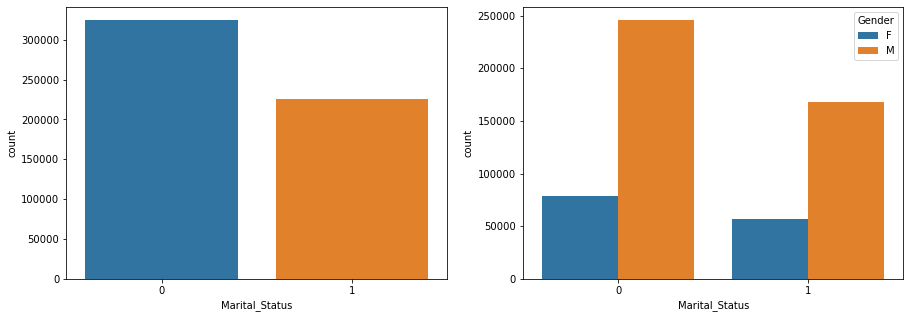

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot(x='Marital_Status', data = df, ax=axs[0])
sns.countplot(x='Marital_Status', hue = 'Gender', data = df, ax=axs[1])
plt.show()

* No, unmarried people buy more, both in men and women.
* We should take care of singles in our next marketing campaign.

### Which age buys more?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


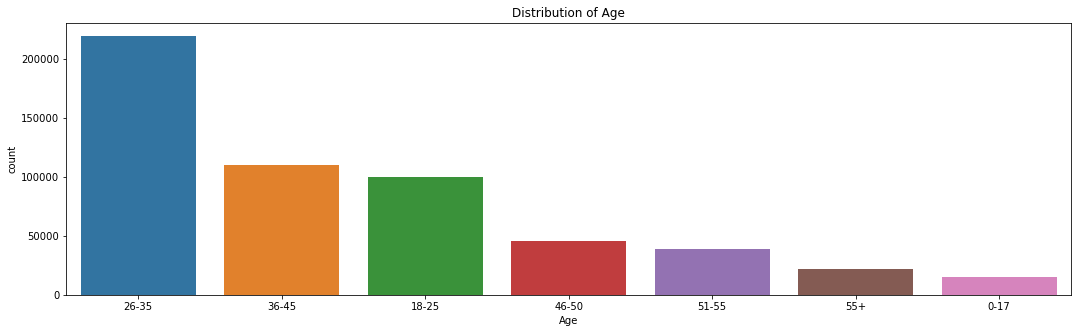

In [30]:
countplot('Age')

* 26-35 years old shop the most in age groups

### Is the average amount of 26-35 year olds the highest?

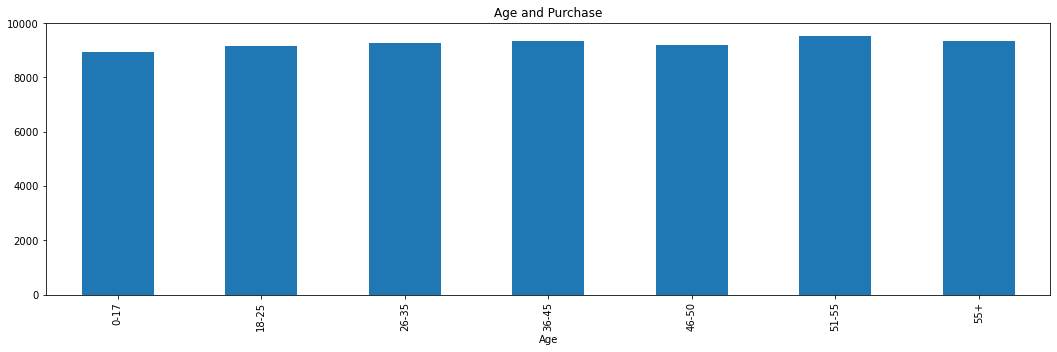

In [46]:
barplot("Age")

* There is no difference between the average purchase

### Product_Category_1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


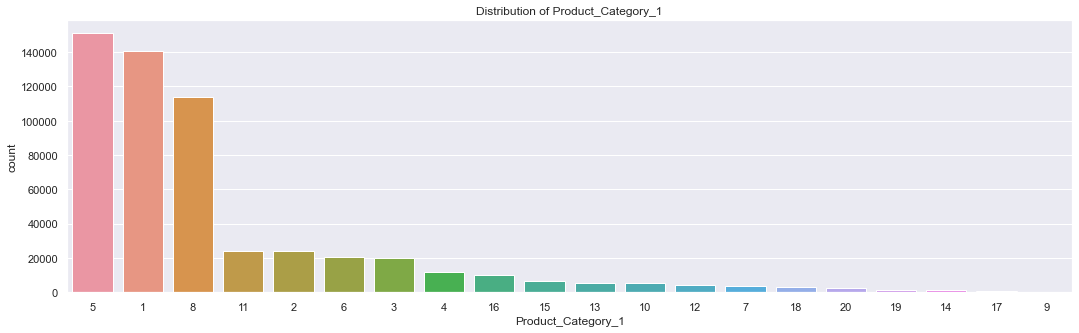

In [53]:
countplot('Product_Category_1')

* Product 5,1,8 has much of purchase

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


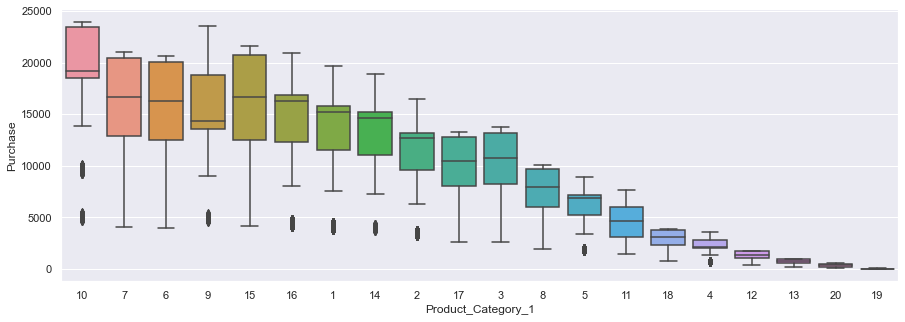

In [51]:
snsbox("Product_Category_1")

* Product 5,8 has much bought count but the price is not high.
* The mean of Product_Category_1 is different. The product 10, 7, 6 has highest of purchase median

### Product_Category_2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


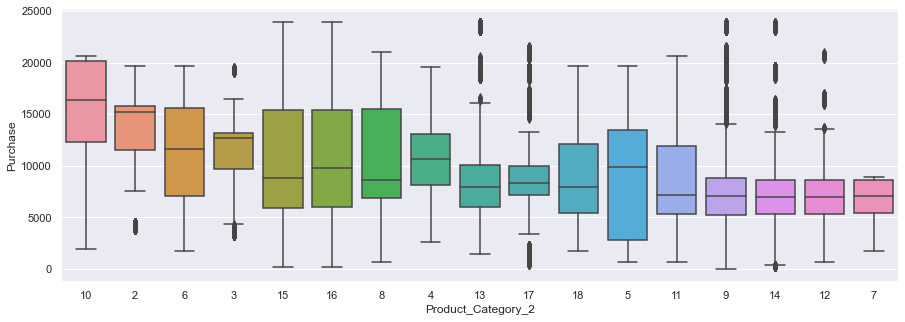

In [54]:
snsbox("Product_Category_2")

* Product_Category_2 is not different in price

### Product_ID

### Top 10 product_ID with the highest purchase?

In [19]:
data1 = df.groupby('Product_ID').agg({'Purchase':'sum'}).reset_index()
data2 = df['Product_ID'].value_counts()
data2 = pd.DataFrame({'Product_ID':data2.index, 'Count':data2.values})
data = pd.merge(data1,data2,left_on='Product_ID',right_on='Product_ID',how = 'left');

data = data.sort_values(['Purchase'],ascending=False)[0:10];
data

,Product_ID,Purchase,Count
249,P00025442,27995166,1615
1016,P00110742,26722309,1612
2443,P00255842,25168963,1383
582,P00059442,24338343,1406
1745,P00184942,24334887,1440
1030,P00112142,24216006,1562
1018,P00110942,23639564,1360
2263,P00237542,23425576,1394
565,P00057642,23102780,1470
104,P00010742,22164153,1350


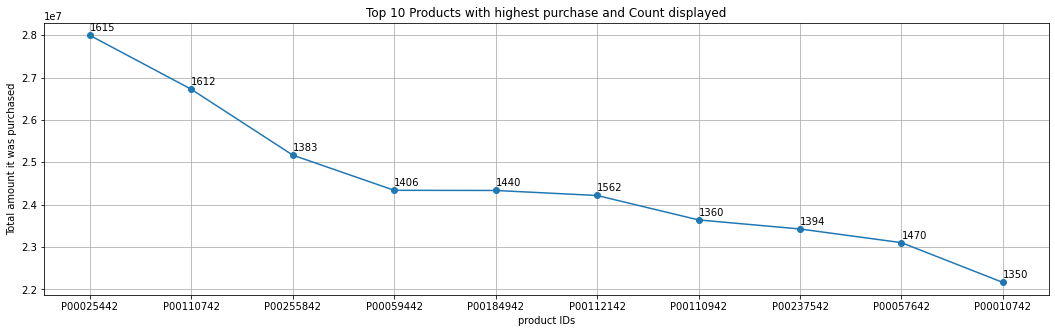

In [20]:
plt.figure(figsize=(18,5));
plt.grid();
plt.plot(data['Product_ID'],data['Purchase'],'o-');
plt.xlabel('product IDs');
plt.ylabel('Total amount it was purchased');
plt.title('Top 10 Products with highest purchase and Count displayed');
for a,b,c in zip(data['Product_ID'], data['Purchase'], data['Count']): 
    plt.text(a, b+100000, str(c))  
plt.show();

* The first product sold 28 million with the number of 1615, the second product was 26.7 million with the number of 1612. The highest sales product also had a higher price.
* The 3rd product sold in quantity of 1383, lower than the 4th product, but the 4th product had a lower price than the 3rd product, so even though the quantity was larger, the purchase was still lower than the product 3rd

### Which products are best selling with the group of age?

In [21]:
data1 = df.groupby('Age')['Product_ID'].apply(lambda x: x.value_counts().index[0]).reset_index()
data1

,Age,Product_ID
0,0-17,P00255842
1,18-25,P00265242
2,26-35,P00265242
3,36-45,P00025442
4,46-50,P00265242
5,51-55,P00265242
6,55+,P00265242


* P00265242 best selling with most age groups. 
* Age group 18-35, 46-55+ buy this product the most. 
* The group 0-17 years old bought the most P00255842, 36-45 bought the most P00025442.

### Correlation

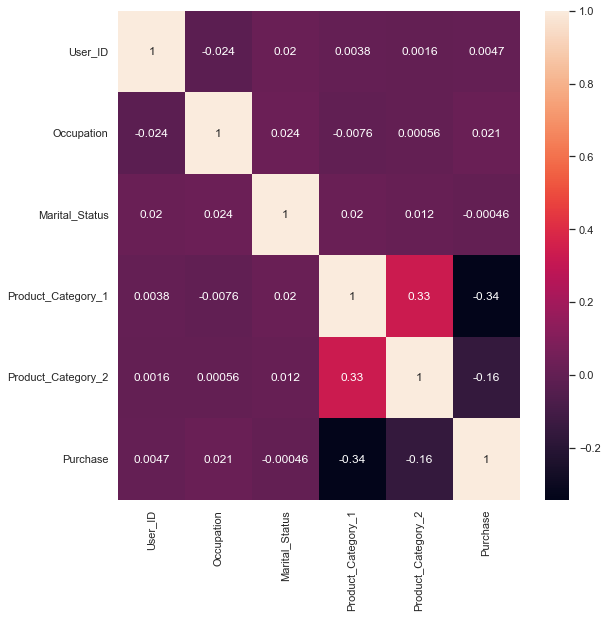

In [46]:
#df = pd.read_csv('data/train/train.csv')
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

Looking at the graph, we see that Purchase is highly correlated with the feature 'Product_Category_1' and 'Product_Category_2'

# Section 3: Data preparation
###  Data preprocessing

In [47]:
df['Age'] = df['Age'].apply(lambda x:str(x).replace('55+', '55'))
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int')

In [48]:
# Delete unuse column
df.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)

In [49]:
# Encode object features

from sklearn.preprocessing import LabelEncoder

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Age'] = LabelEncoder().fit_transform(df['Age'])
df['City_Category'] = LabelEncoder().fit_transform(df['City_Category'])

# Section 4: Modeling

In [4]:
from sklearn.model_selection import train_test_split
# Devide data to X, Y
X = df.drop("Purchase", axis = 1)
Y = df["Purchase"]
x_train,x_test,y_train,y_test = train_test_split(X, Y,test_size=0.3)


KeyboardInterrupt



In [51]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression()


In [52]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 10965.26371489582
                            Coefficient
Gender                       504.349401
Age                          121.627916
Occupation                     7.515733
City_Category                343.884944
Stay_In_Current_City_Years     7.713232
Marital_Status               -48.304747
Product_Category_1          -416.428459
Product_Category_2           -57.368666


* Look at the Intercept parameter, we also see that Purchase highly correlated with Gender, Product_Category_1, City_Category, Age                     

In [53]:
predictions = lm.predict(x_test)

## Formula

#### MAE:

\begin{align}
       \text{MAE = }\frac{1}n \sum_{i=1}^{n}|Predicted_i-Actual_i|
    \end{align}

#### RMSE:
 \begin{align}
       \text{RMSE = }\sqrt{\frac{1}n \sum_{i=1}^{n}(Predicted_i-Actual_i)^2}
    \end{align}

In [58]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE', (metrics.mean_squared_error(y_test, predictions, squared=False)))

MAE: 3590.491945782574
RMSE 4690.037878114225


# Section 5: Summary the Results

### Question 1: Who should be the target customer in the next campain?
* In the next marketing campaign, we are more interested in men, because the percentage of men buying is 75%.
* City B has the most purchases. Focus on this customer. Or we should have coupon for city A, C to attract customers to buy more.
* We have to care about people who are within a year in the city because they have more purchases than others.
* We should take care of singles in our next marketing campaign.
* The age group 26-35 buys the most of the age groups. Attention should be paid to this age group.

### Question 2: Which product should be cared in the next campain?
* Purchase is heavily influenced by Product Category.
* The most purchased products are 5, 1, 8 in Product_Category_1, should be displayed at the front of the store to increase sales.
* There is a clear difference between the product types in Product_category_1 in price varience, so depending on the company's strategy towards which price to choose the right product.

### Question 3: Which products are best selling ?
* The first product sold 28 million with the number of 1615, the second product was 26.7 million with the number of 1612. The highest sales product also had a higher price.
* The 3rd product sold in quantity of 1383, lower than the 4th product, but the 4th product had a lower price than the 3rd product, so even though the quantity was larger, the purchase was still lower than the product 3rd
P00265242 best selling with most age groups.
* Age group 18-35, 46-55+ buy this product the most.
* The group 0-17 years old bought the most P00255842, 36-45 bought the most P00025442.